## 安裝 LangGraph

In [ ]:
pip install langgraph langchain-openai langchain

## Step 1：準備 LLM

In [ ]:
from langchain_openai import ChatOpenAI
import os

os.environ["OPENAI_API_KEY"] = "sk-proj-XXXXX"

llm = ChatOpenAI(model="gpt-4o-mini")

## Step 2：定義 State
建立一個簡單的「寫作 Agent」：
- 將使用者輸入的 topic
- 交給 LLM 寫一段短文

In [2]:
from typing import TypedDict

class WritingState(TypedDict):
    topic: str
    article: str

## Step 3：建立你的第一個 Node
Node 是純函式，接收 state，回傳要更新的部分欄位。

In [3]:
def write_article_node(state: WritingState):
    topic = state["topic"]
    prompt = f"請根據題目「{topic}」寫一段 100 字文章："
    result = llm.invoke(prompt)
    return {"article": result.content}

## Step 4：建立 Graph
LangGraph 的基本步驟：

1. 建立 graph builder
2. 加入 Node
3. 設定起點（start）
4. 決定流程（edge）
5. 建立圖（compile）


In [4]:
from langgraph.graph import StateGraph, END

# 1. 建立 graph builder
builder = StateGraph(WritingState)

# 2. 加入節點
builder.add_node("write_article", write_article_node)

# 3. 設定起點
builder.set_entry_point("write_article")

# 4. 設定流程：寫完文章後 -> 結束
builder.add_edge("write_article", END)

# 5. 編譯 graph
graph = builder.compile()

## 執行你的 Graph

In [5]:
result = graph.invoke({"topic": "台灣夜市文化"})
print(result)

{'topic': '台灣夜市文化', 'article': '台灣夜市文化是台灣社會的重要組成部分，展現了地方特色與人情味。夜市燈火通明，琳琅滿目的攤位吸引著各年齡層的遊客。從臭豆腐、珍珠奶茶到鹽酥雞，每樣美食都讓人垂涎欲滴。此外，夜市中常見的遊戲攤位與表演，也為人們增添了許多樂趣，成為家人朋友聚會的理想場所。夜市不僅是美食的殿堂，更是台灣文化交流與情感連結的重要平台，折射出當地居民的熱情與生活方式。'}


## 視覺化流程圖

### 文字版：

In [7]:
mermaid_code = graph.get_graph().draw_mermaid()
print(mermaid_code)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	write_article(write_article)
	__end__([<p>__end__</p>]):::last
	__start__ --> write_article;
	write_article --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



### 圖片版：

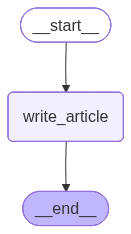

In [9]:
from IPython.display import Image, display

png_bytes = graph.get_graph().draw_mermaid_png()


display(Image(png_bytes))

## 完整程式碼

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, END
from langchain_openai import ChatOpenAI
import os

# ---------------------
# 1. 準備LLM
# ---------------------
os.environ["OPENAI_API_KEY"] = "sk-proj-XXXXX"

llm = ChatOpenAI(model="gpt-4o-mini")

# ---------------------
# 2. 定義 State
# ---------------------
class WritingState(TypedDict):
    topic: str
    article: str

# ---------------------
# 3. 建立 Node
# ---------------------
def write_article_node(state: WritingState):
    prompt = f"請根據題目「{state['topic']}」寫一段 100 字文章："
    result = llm.invoke(prompt)
    return {"article": result.content}

# ---------------------
# 4. 建立 Graph
# ---------------------
builder = StateGraph(WritingState)
builder.add_node("write_article", write_article_node)
builder.set_entry_point("write_article")
builder.add_edge("write_article", END)
graph = builder.compile()

# ---------------------
# 5. 執行 Graph
# ---------------------
result = graph.invoke({"topic": "台灣夜市文化"})
print(result)

{'topic': '台灣夜市文化', 'article': '台灣夜市文化是獨特且富有魅力的社會現象，吸引了無數遊客和當地居民。夜市以其多樣化的小吃聞名，如臭豆腐、珍珠奶茶和蚵仔煎等，讓人垂涎欲滴。除了美食，夜市還提供了各式各樣的遊戲攤位和手作商品，展現了豐富的地方創意與人情味。夜晚的熱鬧氛圍和燈光閃爍，成為人們聚會、交流和享受生活的場所。這種文化不僅是飲食的享受，更是人們生活中的重要社交場域。'}
